In [1]:
import pandas as pd
import os
os.environ[ 'MPLCONFIGDIR' ] = '/tmp/'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_DSIZE_DOUBLINGS = 12

In [3]:
pandas_v_rapids = pd.read_csv('AWS Results/pandas_v_rapids_results.csv',
                              index_col=0, 
                               header=[0, 1], skipinitialspace=True)

In [4]:
spark = pd.read_csv('AWS Results/spark_etl_results.csv')

In [5]:
results_df_pandas = pandas_v_rapids['Pandas']

In [6]:
results_df_rapids = pandas_v_rapids['Rapids']

In [25]:
# Defining the plot that is used
def plot(axs, averages_pandas, averages_rapids, averages_spark, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Pandas')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')
    axs.bar(ind+width+width, 
            height=averages_spark, 
            width = width, 
            color='purple',label='Spark')

    axs.set_ylabel('Average Time (s)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=25)
    axs.xaxis.label.set_fontsize(20)
    axs.yaxis.label.set_fontsize(20)
    for item in (axs.get_xticklabels() + axs.get_yticklabels()):
        item.set_fontsize(17)
        
    axs.legend(loc='upper right')
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    return axs

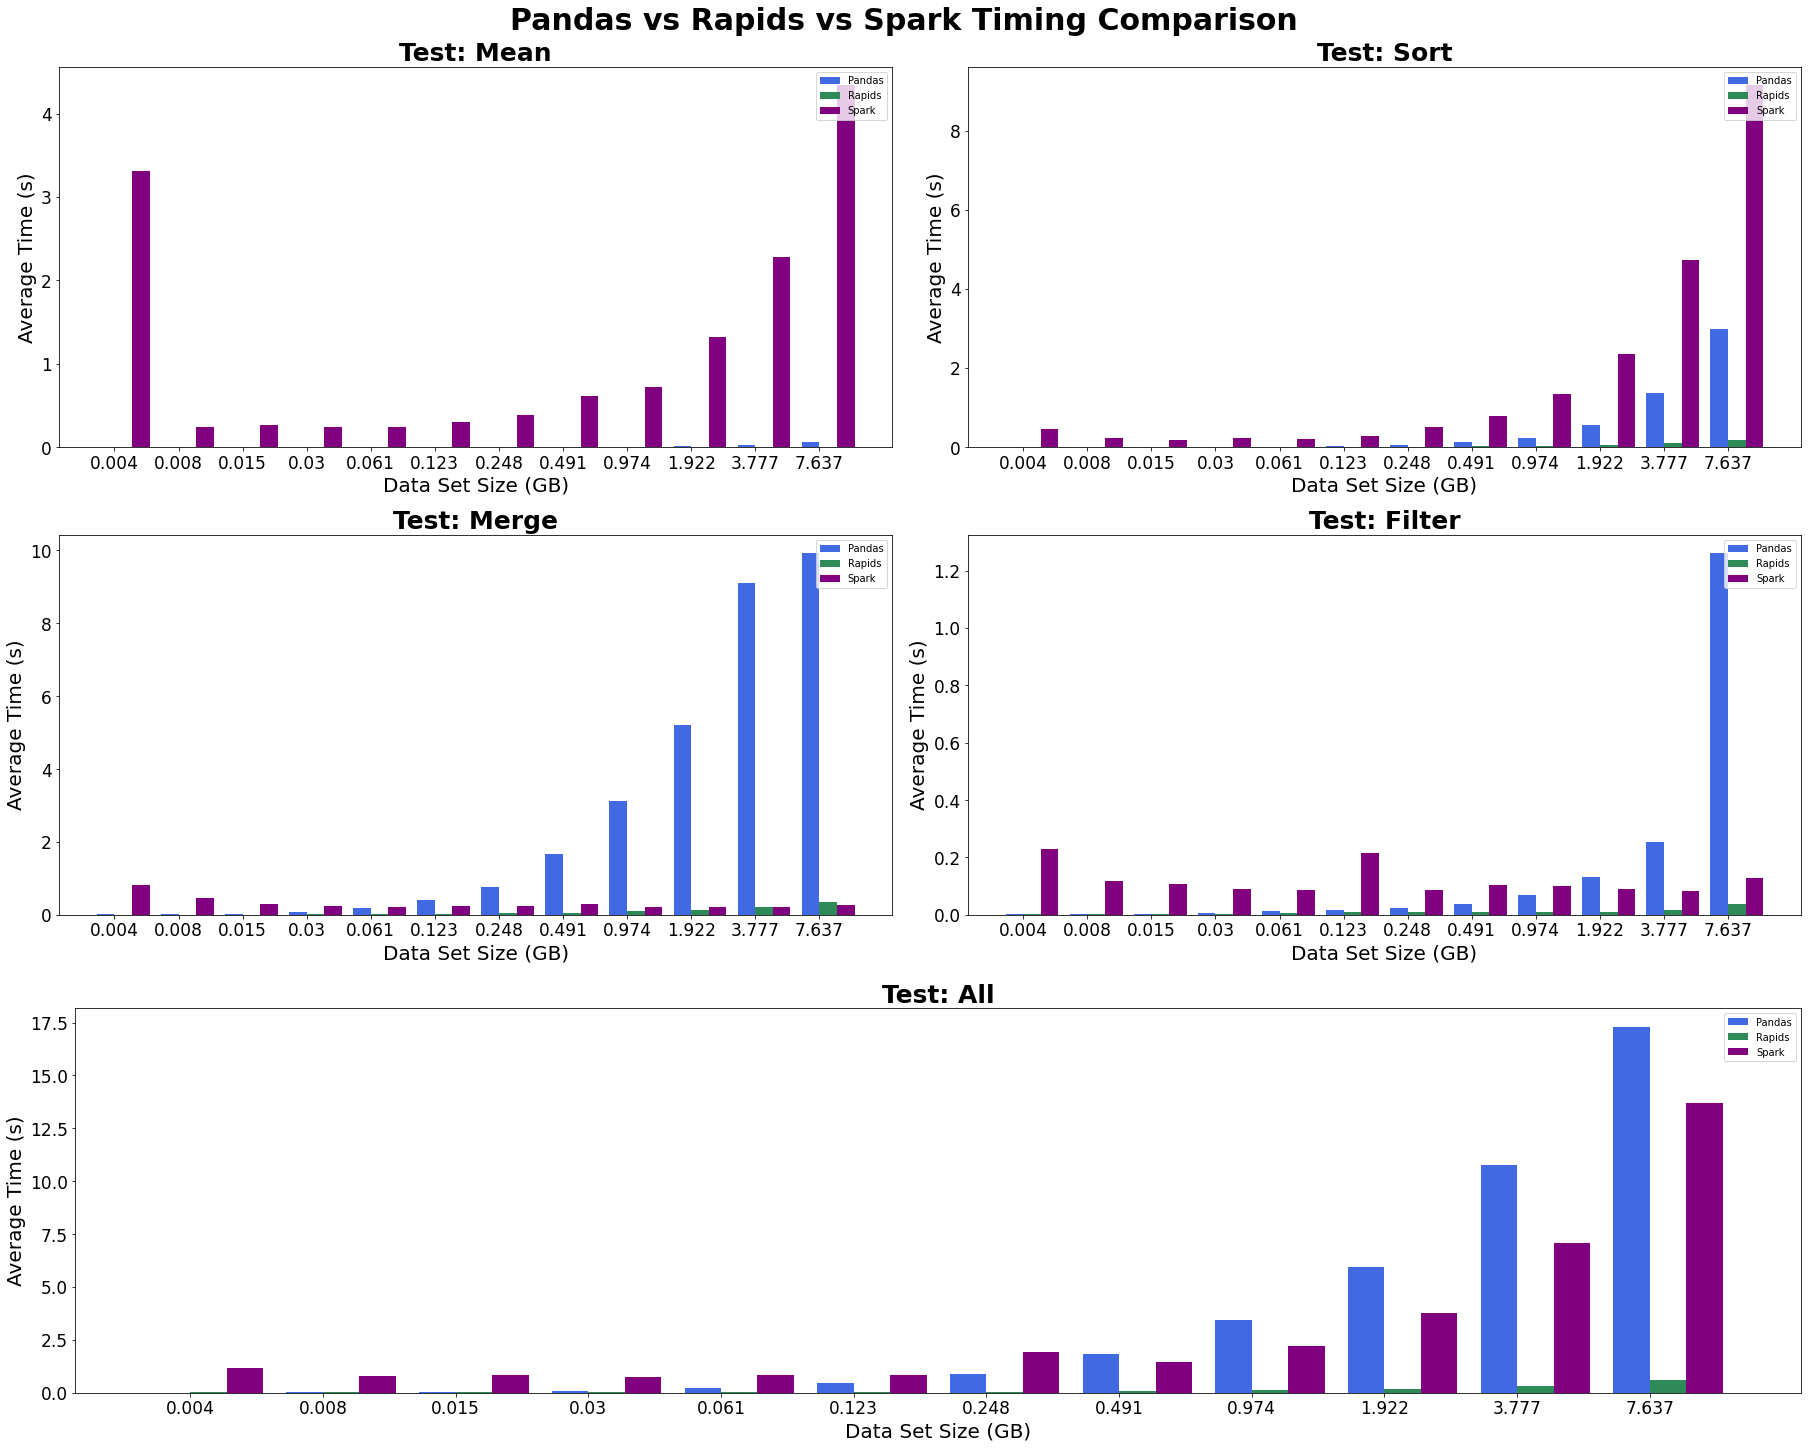

In [29]:
# Creating the plot matrix

# Computing an array to hold the test names
tests = np.append(results_df_pandas['Test'].drop_duplicates().values,'None').reshape((3,2))

# Defining the figure
fig = plt.figure(constrained_layout=True,figsize=(3,3))
fig.tight_layout(pad=5.0)

fig.suptitle('Pandas vs Rapids vs Spark Timing Comparison', fontsize=30, fontweight="bold")

# Setting the fig size
fig.set_size_inches(25, 20)

# Creating the subfigures
subfigs = fig.subfigures(2, 1, wspace=1,height_ratios=[2, 1.])
axs = subfigs[0].subplots(2, 2)

# Setting the number of bars
# ind = np.arange(NUM_DSIZE_DOUBLINGS)
ind = np.arange(0, NUM_DSIZE_DOUBLINGS*2, 2)

# Defining the width between the bars
width = 0.55

# Defining the bar labels
bar_labels = np.round(results_df_pandas['Test Size'].drop_duplicates(), 3).astype(str)

# Creating the plots
for i in range(0, 2):
    for j in range(0, 2):
        test = tests[i, j]            
        plot(axs[i,j], 
             results_df_pandas[results_df_pandas['Test'] == test]['Average'],
             results_df_rapids[results_df_rapids['Test'] == test]['Average'],
             spark[spark['Test'] == test]['Average'],
             test)
# Creating the bottom plot since there is an odd number
ax = subfigs[1].subplots(1,1)
plot(ax, 
     results_df_pandas[results_df_pandas['Test'] == 'All']['Average'],
     results_df_rapids[results_df_rapids['Test'] == 'All']['Average'],
     spark[spark['Test'] == 'All']['Average'],
     'All')
plt.savefig('AWS Results/etl_timing.png')
plt.show()